## This notebook aims to use Machine Learning Algorithms to find the insights between traffic patterns and roadway segment attributes 

In [1]:
import pandas as pd

In [2]:
link = pd.read_excel('ML_input/export_SHIPS_ATTR_SIMPLIFIED.xlsx')
link_confirmed = pd.read_csv('ML_input/LINKID_ATTR_processed.csv')
speed_vol = pd.read_excel('ML_input/hourly_speed_for_hongwei.xlsx')

processed_speed_vol = pd.read_csv('hourly_vol_spd_melt.csv')

In [3]:
link.columns

Index(['JURIS_NO', 'ROUTE_NO', 'JURISDICTION', 'CONST_DIST_NO',
       'CONST_DIST_NAME', 'FACILITY_NAME', 'ROUTENUMBER', 'SIGNED_PRIMARY',
       'LAND_USE_ID', 'LAND_USE_DESC', 'TERRAIN_TYPE_ID', 'TERRAIN_TYPE_DESC',
       'PERCENT_GRADE', 'ACCESS_CONTROL_ID', 'OPERATION_TYPE_ID',
       'OPERATION_TYPE_DESC', 'NUM_THRU_LANES', 'AVG_LANE_WIDTH',
       'PAVEMENT_TYPE_ID', 'MEDIAN_TYPE_DESC', 'PERCENT_HV', 'LINKID',
       'LINKID_REQUESTED'],
      dtype='object')

In [4]:
link.head()

,JURIS_NO,ROUTE_NO,JURISDICTION,CONST_DIST_NO,CONST_DIST_NAME,FACILITY_NAME,ROUTENUMBER,SIGNED_PRIMARY,LAND_USE_ID,LAND_USE_DESC,...,ACCESS_CONTROL_ID,OPERATION_TYPE_ID,OPERATION_TYPE_DESC,NUM_THRU_LANES,AVG_LANE_WIDTH,PAVEMENT_TYPE_ID,MEDIAN_TYPE_DESC,PERCENT_HV,LINKID,LINKID_REQUESTED
0,95,81,Washington County,1,Bristol,I-81N,81,NO,SLD,Suburban Low Density,...,F,2W,Two-way,4,12,P,Depressed,20,10181,10181
1,98,81,Wythe County,1,Bristol,I-81N,81,NO,RUR,Rural,...,F,2W,Two-way,4,12,P,Depressed,25,10187,10187
2,139,81,Town of Wytheville,1,Bristol,I-81N,81,NO,SLD,Suburban Low Density,...,F,2W,Two-way,6,12,P,Depressed,28,10189,10189
3,102,81,City of Bristol,1,Bristol,I-81N,81,NO,SLD,Suburban Low Density,...,F,2W,Two-way,6,12,P,Depressed,21,10397,10397
4,139,77,Town of Wytheville,1,Bristol,I-77N,77,NO,SLD,Suburban Low Density,...,F,2W,Two-way,4,12,P,Depressed,24,10441,10441


In [5]:
speed_vol.head()

,LINKID,MY_YEAR,MY_MONTH,Vol_0,Vol_1,Vol_2,Vol_3,Vol_4,Vol_5,Vol_6,...,Spd_16,Spd_17,Spd_18,Spd_19,Spd_20,Spd_21,Spd_22,Spd_23,Year,TMC
0,10181,2018,5,257.184951,217.785085,192.268243,179.160807,258.968803,469.153127,741.694718,...,67.982198,67.892433,67.742259,66.988628,66.841196,66.025231,66.627496,65.920091,20185,10181
1,10181,2018,6,281.670962,210.003203,195.622031,194.622016,281.480483,501.960036,749.963819,...,67.870762,68.277281,68.171072,67.086629,66.881865,66.485605,66.403013,66.755143,20186,10181
2,10181,2018,7,285.279965,221.610215,196.290384,197.771076,280.294969,475.795651,735.854498,...,67.761902,68.529927,68.277155,67.656369,67.088108,66.080858,65.460646,65.505765,20187,10181
3,10181,2018,8,289.013048,201.165886,193.391801,184.474468,274.928235,488.852766,737.669221,...,68.610016,68.893475,68.580471,67.830703,67.247613,67.076857,67.204567,67.045935,20188,10181
4,10181,2018,9,237.007399,184.755768,179.205595,173.205407,262.458194,466.614568,736.973008,...,68.942065,68.079991,68.876345,67.663846,67.248915,67.529644,66.908066,66.977716,20189,10181


In [6]:
train_set_0 = processed_speed_vol.merge(link, on='LINKID')
train_set = train_set_0.merge(link_confirmed, on='LINKID')

In [7]:
train_set.shape

(1191132, 38)

In [8]:
train_set  = train_set[train_set.speed > train_set.POST_SPD*0.7]

In [9]:
train_set.shape

(1179637, 38)

In [10]:
train_set.head()

,LINKID,Date,hour,vol,speed,Volume Quality,CValue,MY_YEAR,MY_MONTH,MY_DAY,...,PAVEMENT_TYPE_ID,MEDIAN_TYPE_DESC,PERCENT_HV,LINKID_REQUESTED,TMC,LANE_NUM,POST_SPD,LINK_CAP,ACTIVEDATE,RTE_NM
0,10181,20180511,5,460,67.0,5,95.55,2018,5,11,...,P,Depressed,20,10181,10181,2,70,2300,NaN,NaN
1,10181,20180511,6,802,67.0,5,98.30,2018,5,11,...,P,Depressed,20,10181,10181,2,70,2300,NaN,NaN
2,10181,20180511,7,1406,66.0,5,99.53,2018,5,11,...,P,Depressed,20,10181,10181,2,70,2300,NaN,NaN
3,10181,20180511,8,1513,67.0,5,97.20,2018,5,11,...,P,Depressed,20,10181,10181,2,70,2300,NaN,NaN
4,10181,20180511,9,1415,67.0,5,99.66,2018,5,11,...,P,Depressed,20,10181,10181,2,70,2300,NaN,NaN


In [11]:
train_set.columns

Index(['LINKID', 'Date', 'hour', 'vol', 'speed', 'Volume Quality', 'CValue',
       'MY_YEAR', 'MY_MONTH', 'MY_DAY', 'JURIS_NO', 'ROUTE_NO', 'JURISDICTION',
       'CONST_DIST_NO', 'CONST_DIST_NAME', 'FACILITY_NAME', 'ROUTENUMBER',
       'SIGNED_PRIMARY', 'LAND_USE_ID', 'LAND_USE_DESC', 'TERRAIN_TYPE_ID',
       'TERRAIN_TYPE_DESC', 'PERCENT_GRADE', 'ACCESS_CONTROL_ID',
       'OPERATION_TYPE_ID', 'OPERATION_TYPE_DESC', 'NUM_THRU_LANES',
       'AVG_LANE_WIDTH', 'PAVEMENT_TYPE_ID', 'MEDIAN_TYPE_DESC', 'PERCENT_HV',
       'LINKID_REQUESTED', 'TMC', 'LANE_NUM', 'POST_SPD', 'LINK_CAP',
       'ACTIVEDATE', 'RTE_NM'],
      dtype='object')

In [12]:
train_set['hour'] = pd.to_numeric(train_set['hour'])

In [13]:

TRAIN_FEATS = [
# 'MY_YEAR', 'MY_MONTH', 'hour',
 
        'vol','ROUTE_NO','AVG_LANE_WIDTH','PERCENT_HV' ,'PERCENT_GRADE','POST_SPD','LANE_NUM'

]

TARGET_COL = 'speed'
# TARGET_COL = 'churn_prob'

## all LINKID SPD

In [14]:
import copy
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib as mpl
train_set_0 = processed_speed_vol.merge(link, on='LINKID')
train_set_all = train_set_0.merge(link_confirmed, on='LINKID')
train_set_all  = train_set_all[train_set_all.speed > train_set_all.POST_SPD*0.7]
# train_set_all['hour'] = pd.to_numeric(train_set_all['hour'])
train_set_all['hour Column'] = train_set_all['hour'].astype(float)

train_result_spd = pd.DataFrame()

train_set_all['hour'] = pd.to_numeric(train_set_all['hour'])
train_set = train_set_all[(train_set_all['hour'] > 6) & (train_set_all['hour'] < 20) ]

X_train, X_test, y_train, y_test = train_test_split(train_set[TRAIN_FEATS], train_set[TARGET_COL], test_size=0.2, random_state=42)

categorical_feature = [
    #'MY_YEAR', 'MY_MONTH', 'hour',
    'LANE_NUM', 'POST_SPD','ROUTE_NO'
       ]
# dtrain = lgb.Dataset(X_train, label=y_train)
# dtest = lgb.Dataset(X_test, label=y_test)

dtrain = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_feature)
dtest = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_feature)

param = {'objective': 'quantile', 'num_leaves': 31, 'learning_rate': 0.08}
param['metric'] = 'rmse'

num_round = 2000

bst = lgb.train(param, dtrain, num_round, valid_sets=[dtrain, dtest], 
                categorical_feature=categorical_feature, early_stopping_rounds=5, verbose_eval=1)


pred = bst.predict(X_test)
mpl.rcParams['agg.path.chunksize'] = 100000
train_set['prediction'] = bst.predict(train_set[TRAIN_FEATS])

train_result_spd=train_result_spd.append(train_set)

C:\windows\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\windows\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\windows\Anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\windows\Anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in para

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 654311, number of used features: 6
[LightGBM] [Info] Start training from score 71.496506
[1]	training's rmse: 6.36215	valid_1's rmse: 6.3626
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 6.2489	valid_1's rmse: 6.24926
[3]	training's rmse: 6.12638	valid_1's rmse: 6.12661
[4]	training's rmse: 6.01631	valid_1's rmse: 6.01637
[5]	training's rmse: 5.91727	valid_1's rmse: 5.91719
[6]	training's rmse: 5.81784	valid_1's rmse: 5.81781
[7]	training's rmse: 5.733	valid_1's rmse: 5.73292
[8]	training's rmse: 5.6397	valid_1's rmse: 5.63959
[9]	training's rmse: 5.56416	valid_1's rmse: 5.56407
[10]	training's rmse: 5.49573	valid_1's rmse: 5.49561
[11]	

[150]	training's rmse: 3.7416	valid_1's rmse: 3.74845
[151]	training's rmse: 3.74156	valid_1's rmse: 3.74841
[152]	training's rmse: 3.74163	valid_1's rmse: 3.74846
Early stopping, best iteration is:
[147]	training's rmse: 3.74145	valid_1's rmse: 3.74836


C:\Users\enhua.liu\AppData\Local\Temp/ipykernel_28428/2265435012.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['prediction'] = bst.predict(train_set[TRAIN_FEATS])


In [15]:
TRAIN_FEATS

['vol',
 'ROUTE_NO',
 'AVG_LANE_WIDTH',
 'PERCENT_HV',
 'PERCENT_GRADE',
 'POST_SPD',
 'LANE_NUM']

In [16]:
train_result_spd.to_csv(r'train_output_spd.csv', index=False)

In [17]:
train_result_spd.groupby('LINKID')[['speed', 'prediction']]

In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

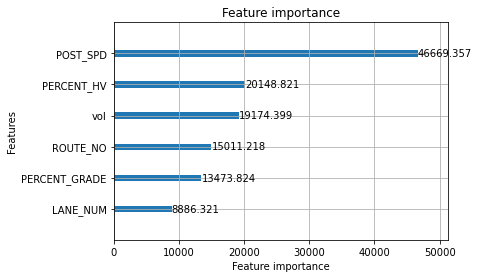

In [19]:
lgb.plot_importance(bst, importance_type='gain')

In [20]:
pip install shap

In [21]:
import shap

In [22]:
import shap
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(train_set[TRAIN_FEATS])

In [23]:
shap.__version__

'0.41.0'

In [24]:
shap_values

array([[ 0.47296003, -0.53831289,  0.        , ..., -0.12622645,
         1.83569836,  0.01982257],
       [ 0.47838968, -0.54179111,  0.        , ..., -0.13252591,
         1.84125103,  0.01967912],
       [ 0.46428551, -0.53831289,  0.        , ..., -0.12650065,
         1.84409163,  0.01982257],
       ...,
       [ 0.22580498, -0.15085309,  0.        , ...,  0.82749555,
        -1.28860087,  0.08035499],
       [ 0.02068638, -0.13485631,  0.        , ...,  0.81875002,
        -1.30289668,  0.08667762],
       [-0.71772602, -0.07913844,  0.        , ...,  0.73429576,
        -1.39548118,  0.0896204 ]])

In [25]:
shap_values.shape

(817889, 7)

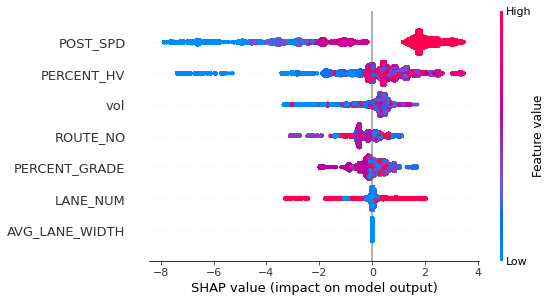

In [26]:
shap.summary_plot(shap_values, train_set[TRAIN_FEATS])

In [27]:
# shap.summary_plot(shap_values.values[:,:,1], train_set[TRAIN_FEATS], show=False)

## Iterative LINKID SPD

In [28]:
train_set_0 = processed_speed_vol.merge(link, on='LINKID')

train_set_all = train_set_0.merge(link_confirmed, on='LINKID')
train_set_all  = train_set_all[train_set_all.speed > train_set_all.POST_SPD*0.7]
# train_set_all['hour'] = pd.to_numeric(train_set_all['hour'])
train_set_all['hour Column'] = train_set_all['hour'].astype(float)

In [29]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [30]:
import copy
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib as mpl

train_result_spd_linkid = pd.DataFrame()

# print(train_set.LINKID.unique())
for i in  train_set_all.LINKID.unique():
    train_set_filter = train_set_all[train_set_all.LINKID==i]
    train_set_filter['hour'] = pd.to_numeric(train_set_filter['hour'])
    train_set = train_set_filter[(train_set_filter['hour'] > 6) & (train_set_filter['hour'] < 20) ]
    print(train_set.shape,i)
    X_train, X_test, y_train, y_test = train_test_split(train_set[TRAIN_FEATS], train_set[TARGET_COL], test_size=0.2, random_state=42)
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_test, label=y_test)
    param = {'objective': 'regression', 'num_leaves': 31, 'learning_rate': 0.1}
    param['metric'] = 'rmse'

    num_round = 100
    categorical_feature = [
        #'MY_YEAR', 'MY_MONTH', 'hour',
        'LANE_NUM', 'POST_SPD'
    
           ]
    bst = lgb.train(param, dtrain, num_round, valid_sets=[dtrain, dtest], 
                    categorical_feature=categorical_feature, early_stopping_rounds=5, verbose_eval=1)
    pred = bst.predict(X_test)
    mpl.rcParams['agg.path.chunksize'] = 100000
    train_set['prediction'] = bst.predict(train_set[TRAIN_FEATS])
    print(train_set.tail(),i)
    train_result_spd_linkid=train_result_spd_linkid.append(train_set)
    
train_result_spd_linkid.to_csv(r'train_output_spd_by_linkid.csv', index=False)    
    

(4239, 39) 10181
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3391, number of used features: 1
[LightGBM] [Info] Start training from score 69.442642
[1]	training's rmse: 1.9465	valid_1's rmse: 2.08037
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.93645	valid_1's rmse: 2.07645
[3]	training's rmse: 1.92807	valid_1's rmse: 2.07401
[4]	training's rmse: 1.92071	valid_1's rmse: 2.07299
[5]	training's rmse: 1.91471	valid_1's rmse: 2.07276
[6]	training's rmse: 1.90995	valid_1's rmse: 2.07195
[7]	training's rmse: 1.90567	valid_1's rmse: 2.07315
[8]	training's rmse: 1.90198	valid_1's rmse: 2.07343
[9]	training's rmse: 1.89882	valid_1's rmse: 2.07437
[10]	training's rmse: 1.89619	valid_1's rmse: 2.07559
[11]	training's rmse: 1.89406	valid_1's rmse: 2.07


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5721, number of used features: 1
[LightGBM] [Info] Start training from score 65.761056
[1]	training's rmse: 1.71647	valid_1's rmse: 1.62313
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.71024	valid_1's rmse: 1.62096
[3]	training's rmse: 1.70506	valid_1's rmse: 1.61834
[4]	training's rmse: 1.70073	valid_1's rmse: 1.61669
[5]	training's rmse: 1.69681	valid_1's rmse: 1.61515
[6]	training's rmse: 1.6938	valid_1's rmse: 1.61414
[7]	training's rmse: 1.6912	valid_1's rmse: 1.61343
[8]	training's rmse: 1.6888	valid_1's rmse: 1.6134
[9]	training's rmse: 1.68679	valid_1's rmse: 1.61356
[10]	training's rmse: 1.68482	valid_1's rmse: 1.61333
[11]	training's rmse: 1.6835	valid_1's rmse: 1.61357
[12]	training's r


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

       LINKID      Date  hour   vol  speed  Volume Quality  CValue  MY_YEAR  \
33999   10397  20191231    15  1475   73.0               4   99.72     2019   
34000   10397  20191231    16  1460   73.0               4  100.00     2019   
34001   10397  20191231    17  1345   73.0               4  100.00     2019   
34002   10397  20191231    18  1077   72.0               4   99.82     2019   
34003   10397  20191231    19   739   71.0               4   98.23     2019   

       MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  LANE_NUM  \
33999        12      31  ...          21             10397  10397         3   
34000        12      31  ...          21             10397  10397         3   
34001        12      31  ...          21             10397  10397         3   
34002        12      31  ...          21             10397  10397         3   
34003        12      31  ...          21             10397  10397         3   

      POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Co


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(6679, 39) 10447
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5343, number of used features: 1
[LightGBM] [Info] Start training from score 66.708216
[1]	training's rmse: 2.00083	valid_1's rmse: 2.00689
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.97929	valid_1's rmse: 1.98614
[3]	training's rmse: 1.96131	valid_1's rmse: 1.96914
[4]	training's rmse: 1.94675	valid_1's rmse: 1.95586
[5]	training's rmse: 1.93483	valid_1's rmse: 1.94432
[6]	training's rmse: 1.92488	valid_1's rmse: 1.93553
[7]	training's rmse: 1.91674	valid_1's rmse: 1.92836
[8]	training's rmse: 1.90985	valid_1's rmse: 1.92264
[9]	training's rmse: 1.90428	valid_1's rmse: 1.91816
[10]	training's rmse: 1.8996	valid_1's rmse: 1.91474
[11]	training's rmse: 1.89548	valid_1's rmse: 1.91

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6111, number of used features: 1
[LightGBM] [Info] Start training from score 66.717354
[1]	training's rmse: 1.65958	valid_1's rmse: 1.66891
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.65673	valid_1's rmse: 1.66871
[3]	training's rmse: 1.65435	valid_1's rmse: 1.6684
[4]	training's rmse: 1.65228	valid_1's rmse: 1.66819
[5]	training's rmse: 1.65056	valid_1's rmse: 1.66792
[6]	training's rmse: 1.64925	valid_1's rmse: 1.66789
[7]	training's rmse: 1.64766	valid_1's rmse: 1.66729
[8]	training's rmse: 1.64642	valid_1's rmse: 1.66703
[9]	training's rmse: 1.64511	valid_1's rmse: 1.66716
[10]	training's rmse: 1.64397	valid_1's rmse: 1.66706
[11]	training's rmse: 1.64299	valid_1's rmse: 1.66699
[12]	training

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[16]	training's rmse: 1.63911	valid_1's rmse: 1.66799
[17]	training's rmse: 1.63849	valid_1's rmse: 1.66798
[18]	training's rmse: 1.63778	valid_1's rmse: 1.66809
Early stopping, best iteration is:
[13]	training's rmse: 1.64127	valid_1's rmse: 1.6667
        LINKID      Date  hour  vol      speed  Volume Quality  CValue  \
103756   10567  20191231    13  923  65.605832               4  98.050   
103757   10567  20191231    14  887  66.000000               4  96.030   
103758   10567  20191231    16  762  66.204470               4  97.975   
103759   10567  20191231    18  505  64.000000               4  98.400   
103760   10567  20191231    19  425  65.204246               4  96.495   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
103756     2019        12      31  ...          20             10567  10567   
103757     2019        12      31  ...          20             10567  10567   
103758     2019        12      31  ...          20             10567


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

[LightGBM] [Info] Start training from score 64.231221
[1]	training's rmse: 2.1631	valid_1's rmse: 2.28833
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.15721	valid_1's rmse: 2.28481
[3]	training's rmse: 2.1525	valid_1's rmse: 2.28159
[4]	training's rmse: 2.14844	valid_1's rmse: 2.27976
[5]	training's rmse: 2.14493	valid_1's rmse: 2.27812
[6]	training's rmse: 2.14213	valid_1's rmse: 2.277
[7]	training's rmse: 2.13965	valid_1's rmse: 2.27583
[8]	training's rmse: 2.13736	valid_1's rmse: 2.27422
[9]	training's rmse: 2.13527	valid_1's rmse: 2.27256
[10]	training's rmse: 2.13348	valid_1's rmse: 2.27161
[11]	training's rmse: 2.13203	valid_1's rmse: 2.27148
[12]	training's rmse: 2.13086	valid_1's rmse: 2.27156
[13]	training's rmse: 2.12946	valid_1's rmse: 2.27023
[14]	training's rmse: 2.12834	valid_1's rmse: 2.27102
[15]	training's rmse: 2.12717	valid_1's rmse: 2.2705
[16]	training's rmse: 2.12613	valid_1's rmse: 2.26993
[17]	training's rmse: 2.12519	valid_


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[7]	training's rmse: 0.963129	valid_1's rmse: 1.0146
[8]	training's rmse: 0.96235	valid_1's rmse: 1.01428
[9]	training's rmse: 0.961636	valid_1's rmse: 1.01447
[10]	training's rmse: 0.960972	valid_1's rmse: 1.01442
[11]	training's rmse: 0.960334	valid_1's rmse: 1.01452
[12]	training's rmse: 0.959783	valid_1's rmse: 1.01468
[13]	training's rmse: 0.959357	valid_1's rmse: 1.01476
Early stopping, best iteration is:
[8]	training's rmse: 0.96235	valid_1's rmse: 1.01428
        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
174136   20196  20191231    15  1843  61.629995               4   99.62   
174137   20196  20191231    16  2042  61.000000               4  100.00   
174138   20196  20191231    17  1804  61.000000               4  100.00   
174139   20196  20191231    18  1425  59.629868               4  100.00   
174140   20196  20191231    19  1053  59.251747               4  100.00   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
17

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluati

(7954, 39) 20350
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6363, number of used features: 1
[LightGBM] [Info] Start training from score 67.046624
[1]	training's rmse: 1.68298	valid_1's rmse: 1.70025
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.67708	valid_1's rmse: 1.69715
[3]	training's rmse: 1.67221	valid_1's rmse: 1.69455
[4]	training's rmse: 1.66816	valid_1's rmse: 1.69343
[5]	training's rmse: 1.66489	valid_1's rmse: 1.69205
[6]	training's rmse: 1.66187	valid_1's rmse: 1.69161
[7]	training's rmse: 1.65943	valid_1's rmse: 1.69117
[8]	training's rmse: 1.65754	valid_1's rmse: 1.6911
[9]	training's rmse: 1.65574	valid_1's rmse: 1.69143
[10]	training's rmse: 1.65418	valid_1's rmse: 1.69123
[11]	training's rmse: 1.65294	valid_1's rmse: 1.69

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7712, 39) 20393
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6169, number of used features: 1
[LightGBM] [Info] Start training from score 64.163926
[1]	training's rmse: 2.46452	valid_1's rmse: 2.47414
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.45617	valid_1's rmse: 2.47023
[3]	training's rmse: 2.44978	valid_1's rmse: 2.4675
[4]	training's rmse: 2.44409	valid_1's rmse: 2.46553
[5]	training's rmse: 2.43978	valid_1's rmse: 2.46381
[6]	training's rmse: 2.43594	valid_1's rmse: 2.46318
[7]	training's rmse: 2.43249	valid_1's rmse: 2.46214
[8]	training's rmse: 2.42959	valid_1's rmse: 2.46172
[9]	training's rmse: 2.4271	valid_1's rmse: 2.4614
[10]	training's rmse: 2.42479	valid_1's rmse: 2.46106
[11]	training's rmse: 2.42295	valid_1's rmse: 2.4603

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6592, 39) 20473
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5273, number of used features: 1
[LightGBM] [Info] Start training from score 63.053984
[1]	training's rmse: 2.18489	valid_1's rmse: 2.31101
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.17382	valid_1's rmse: 2.30329
[3]	training's rmse: 2.16503	valid_1's rmse: 2.29706
[4]	training's rmse: 2.15768	valid_1's rmse: 2.292
[5]	training's rmse: 2.15095	valid_1's rmse: 2.28779
[6]	training's rmse: 2.14572	valid_1's rmse: 2.28466
[7]	training's rmse: 2.14119	valid_1's rmse: 2.28261
[8]	training's rmse: 2.13761	valid_1's rmse: 2.28167
[9]	training's rmse: 2.13458	valid_1's rmse: 2.28023
[10]	training's rmse: 2.13192	valid_1's rmse: 2.27939
[11]	training's rmse: 2.12952	valid_1's rmse: 2.279


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(8107, 39) 20475
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6485, number of used features: 1
[LightGBM] [Info] Start training from score 64.452337
[1]	training's rmse: 2.56818	valid_1's rmse: 2.7681
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.55253	valid_1's rmse: 2.75829
[3]	training's rmse: 2.53962	valid_1's rmse: 2.75053
[4]	training's rmse: 2.52916	valid_1's rmse: 2.74401
[5]	training's rmse: 2.52056	valid_1's rmse: 2.73975
[6]	training's rmse: 2.51347	valid_1's rmse: 2.73699
[7]	training's rmse: 2.50765	valid_1's rmse: 2.73477
[8]	training's rmse: 2.50285	valid_1's rmse: 2.73287
[9]	training's rmse: 2.49891	valid_1's rmse: 2.73191
[10]	training's rmse: 2.49547	valid_1's rmse: 2.73055
[11]	training's rmse: 2.49219	valid_1's rmse: 2.72


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(3986, 39) 40001
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3188, number of used features: 1
[LightGBM] [Info] Start training from score 69.219012
[1]	training's rmse: 1.88051	valid_1's rmse: 1.90995
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.84235	valid_1's rmse: 1.87429
[3]	training's rmse: 1.81084	valid_1's rmse: 1.84493
[4]	training's rmse: 1.78444	valid_1's rmse: 1.81995
[5]	training's rmse: 1.76273	valid_1's rmse: 1.79898
[6]	training's rmse: 1.74491	valid_1's rmse: 1.78199
[7]	training's rmse: 1.73012	valid_1's rmse: 1.76729
[8]	training's rmse: 1.71801	valid_1's rmse: 1.75584
[9]	training's rmse: 1.70795	valid_1's rmse: 1.7464
[10]	training's rmse: 1.69954	valid_1's rmse: 1.73882
[11]	training's rmse: 1.69243	valid_1's rmse: 1.73


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(3244, 39) 40038
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2595, number of used features: 1
[LightGBM] [Info] Start training from score 69.489345
[1]	training's rmse: 2.15154	valid_1's rmse: 2.16801
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.11522	valid_1's rmse: 2.13979
[3]	training's rmse: 2.08513	valid_1's rmse: 2.11715
[4]	training's rmse: 2.06037	valid_1's rmse: 2.10031
[5]	training's rmse: 2.0394	valid_1's rmse: 2.08697
[6]	training's rmse: 2.02182	valid_1's rmse: 2.07471
[7]	training's rmse: 2.00772	valid_1's rmse: 2.065
[8]	training's rmse: 1.99566	valid_1's rmse: 2.05779
[9]	training's rmse: 1.98584	valid_1's rmse: 2.05225
[10]	training's rmse: 1.97735	valid_1's rmse: 2.04751
[11]	training's rmse: 1.97056	valid_1's rmse: 2.0444


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6220, 39) 40044
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4976, number of used features: 1
[LightGBM] [Info] Start training from score 71.316780
[1]	training's rmse: 1.92311	valid_1's rmse: 1.90489
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.90514	valid_1's rmse: 1.88852
[3]	training's rmse: 1.8903	valid_1's rmse: 1.87577
[4]	training's rmse: 1.87798	valid_1's rmse: 1.86533
[5]	training's rmse: 1.86779	valid_1's rmse: 1.85717
[6]	training's rmse: 1.85939	valid_1's rmse: 1.85083
[7]	training's rmse: 1.85241	valid_1's rmse: 1.84553
[8]	training's rmse: 1.8465	valid_1's rmse: 1.84167
[9]	training's rmse: 1.84152	valid_1's rmse: 1.83828
[10]	training's rmse: 1.83736	valid_1's rmse: 1.83598
[11]	training's rmse: 1.83376	valid_1's rmse: 1.834


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6755, 39) 40105
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 1
[LightGBM] [Info] Start training from score 70.932480
[1]	training's rmse: 2.61606	valid_1's rmse: 2.35662
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.59683	valid_1's rmse: 2.34427
[3]	training's rmse: 2.58085	valid_1's rmse: 2.33384
[4]	training's rmse: 2.568	valid_1's rmse: 2.32633
[5]	training's rmse: 2.55673	valid_1's rmse: 2.32004
[6]	training's rmse: 2.54775	valid_1's rmse: 2.31576
[7]	training's rmse: 2.54038	valid_1's rmse: 2.31202
[8]	training's rmse: 2.53421	valid_1's rmse: 2.30913
[9]	training's rmse: 2.52903	valid_1's rmse: 2.30605
[10]	training's rmse: 2.52461	valid_1's rmse: 2.30481
[11]	training's rmse: 2.52061	valid_1's rmse: 2.303


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6560, 39) 40110
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5248, number of used features: 1
[LightGBM] [Info] Start training from score 70.230504
[1]	training's rmse: 2.01269	valid_1's rmse: 1.91347
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.00076	valid_1's rmse: 1.90348
[3]	training's rmse: 1.99082	valid_1's rmse: 1.8957
[4]	training's rmse: 1.98264	valid_1's rmse: 1.88936
[5]	training's rmse: 1.97572	valid_1's rmse: 1.88482
[6]	training's rmse: 1.97007	valid_1's rmse: 1.88149
[7]	training's rmse: 1.96519	valid_1's rmse: 1.8788
[8]	training's rmse: 1.9614	valid_1's rmse: 1.87695
[9]	training's rmse: 1.95814	valid_1's rmse: 1.87578
[10]	training's rmse: 1.95494	valid_1's rmse: 1.87461
[11]	training's rmse: 1.95266	valid_1's rmse: 1.874



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6955, 39) 40295
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5564, number of used features: 1
[LightGBM] [Info] Start training from score 62.168584
[1]	training's rmse: 1.8786	valid_1's rmse: 1.65947
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.87076	valid_1's rmse: 1.65045
[3]	training's rmse: 1.86426	valid_1's rmse: 1.64372
[4]	training's rmse: 1.85896	valid_1's rmse: 1.63804
[5]	training's rmse: 1.8546	valid_1's rmse: 1.63337
[6]	training's rmse: 1.85076	valid_1's rmse: 1.62942
[7]	training's rmse: 1.84764	valid_1's rmse: 1.62675
[8]	training's rmse: 1.84519	valid_1's rmse: 1.62458
[9]	training's rmse: 1.84301	valid_1's rmse: 1.62242
[10]	training's rmse: 1.84103	valid_1's rmse: 1.62098
[11]	training's rmse: 1.83929	valid_1's rmse: 1.619


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6793, 39) 40304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5434, number of used features: 1
[LightGBM] [Info] Start training from score 56.172801
[1]	training's rmse: 3.56259	valid_1's rmse: 3.48754
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 3.52909	valid_1's rmse: 3.45721
[3]	training's rmse: 3.50166	valid_1's rmse: 3.43325
[4]	training's rmse: 3.47861	valid_1's rmse: 3.41423
[5]	training's rmse: 3.45984	valid_1's rmse: 3.39801
[6]	training's rmse: 3.44404	valid_1's rmse: 3.38509
[7]	training's rmse: 3.43123	valid_1's rmse: 3.37483
[8]	training's rmse: 3.42027	valid_1's rmse: 3.36744
[9]	training's rmse: 3.41142	valid_1's rmse: 3.36187
[10]	training's rmse: 3.40386	valid_1's rmse: 3.35713
[11]	training's rmse: 3.3976	valid_1's rmse: 3.35


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(4009, 39) 40333
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3207, number of used features: 1
[LightGBM] [Info] Start training from score 67.961983
[1]	training's rmse: 2.30778	valid_1's rmse: 2.32426
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.2632	valid_1's rmse: 2.281
[3]	training's rmse: 2.2264	valid_1's rmse: 2.24602
[4]	training's rmse: 2.19606	valid_1's rmse: 2.21726
[5]	training's rmse: 2.17094	valid_1's rmse: 2.19515
[6]	training's rmse: 2.15016	valid_1's rmse: 2.17611
[7]	training's rmse: 2.13313	valid_1's rmse: 2.16096
[8]	training's rmse: 2.11902	valid_1's rmse: 2.14887
[9]	training's rmse: 2.10734	valid_1's rmse: 2.13911
[10]	training's rmse: 2.09785	valid_1's rmse: 2.13065
[11]	training's rmse: 2.08985	valid_1's rmse: 2.12262


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6447, 39) 40359
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5157, number of used features: 1
[LightGBM] [Info] Start training from score 65.454375
[1]	training's rmse: 1.95749	valid_1's rmse: 2.12314
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.94894	valid_1's rmse: 2.12028
[3]	training's rmse: 1.9419	valid_1's rmse: 2.11857
[4]	training's rmse: 1.93597	valid_1's rmse: 2.11759
[5]	training's rmse: 1.93109	valid_1's rmse: 2.11738
[6]	training's rmse: 1.92689	valid_1's rmse: 2.11748
[7]	training's rmse: 1.92352	valid_1's rmse: 2.11783
[8]	training's rmse: 1.92069	valid_1's rmse: 2.11722
[9]	training's rmse: 1.91815	valid_1's rmse: 2.11769
[10]	training's rmse: 1.91605	valid_1's rmse: 2.11786
[11]	training's rmse: 1.91421	valid_1's rmse: 2.11


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(3204, 39) 40397
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2563, number of used features: 1
[LightGBM] [Info] Start training from score 69.986036
[1]	training's rmse: 2.13553	valid_1's rmse: 2.11894
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.0895	valid_1's rmse: 2.09109
[3]	training's rmse: 2.05129	valid_1's rmse: 2.06877
[4]	training's rmse: 2.01964	valid_1's rmse: 2.05239
[5]	training's rmse: 1.99347	valid_1's rmse: 2.04029
[6]	training's rmse: 1.972	valid_1's rmse: 2.03068
[7]	training's rmse: 1.95434	valid_1's rmse: 2.02397
[8]	training's rmse: 1.9398	valid_1's rmse: 2.01933
[9]	training's rmse: 1.92768	valid_1's rmse: 2.0166
[10]	training's rmse: 1.91766	valid_1's rmse: 2.01478
[11]	training's rmse: 1.9091	valid_1's rmse: 2.01417
[


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(4926, 39) 40418
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3940, number of used features: 1
[LightGBM] [Info] Start training from score 71.542614
[1]	training's rmse: 2.52168	valid_1's rmse: 2.50716
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.475	valid_1's rmse: 2.46933
[3]	training's rmse: 2.43625	valid_1's rmse: 2.43842
[4]	training's rmse: 2.40422	valid_1's rmse: 2.41391
[5]	training's rmse: 2.37794	valid_1's rmse: 2.39451
[6]	training's rmse: 2.35616	valid_1's rmse: 2.37936
[7]	training's rmse: 2.3382	valid_1's rmse: 2.36749
[8]	training's rmse: 2.32343	valid_1's rmse: 2.35795
[9]	training's rmse: 2.31121	valid_1's rmse: 2.35094
[10]	training's rmse: 2.30099	valid_1's rmse: 2.34547
[11]	training's rmse: 2.29259	valid_1's rmse: 2.3413


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(5494, 39) 40488
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4395, number of used features: 1
[LightGBM] [Info] Start training from score 53.084187
[1]	training's rmse: 3.5139	valid_1's rmse: 3.57654
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 3.47146	valid_1's rmse: 3.54284
[3]	training's rmse: 3.43654	valid_1's rmse: 3.5167
[4]	training's rmse: 3.40796	valid_1's rmse: 3.49627
[5]	training's rmse: 3.38424	valid_1's rmse: 3.47931
[6]	training's rmse: 3.36471	valid_1's rmse: 3.46656
[7]	training's rmse: 3.34861	valid_1's rmse: 3.45675
[8]	training's rmse: 3.33524	valid_1's rmse: 3.44916
[9]	training's rmse: 3.3238	valid_1's rmse: 3.44421
[10]	training's rmse: 3.31447	valid_1's rmse: 3.44076
[11]	training's rmse: 3.30664	valid_1's rmse: 3.4388


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(4450, 39) 40493
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3560, number of used features: 1
[LightGBM] [Info] Start training from score 54.231461
[1]	training's rmse: 4.97069	valid_1's rmse: 4.97323
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 4.81392	valid_1's rmse: 4.81501
[3]	training's rmse: 4.68317	valid_1's rmse: 4.68402
[4]	training's rmse: 4.57416	valid_1's rmse: 4.57625
[5]	training's rmse: 4.48356	valid_1's rmse: 4.48692
[6]	training's rmse: 4.40862	valid_1's rmse: 4.41545
[7]	training's rmse: 4.34679	valid_1's rmse: 4.35603
[8]	training's rmse: 4.29555	valid_1's rmse: 4.30856
[9]	training's rmse: 4.25353	valid_1's rmse: 4.27009
[10]	training's rmse: 4.2187	valid_1's rmse: 4.24051
[11]	training's rmse: 4.19038	valid_1's rmse: 4.21


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(3844, 39) 40613
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3075, number of used features: 1
[LightGBM] [Info] Start training from score 66.790894
[1]	training's rmse: 1.8036	valid_1's rmse: 1.87659
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.78172	valid_1's rmse: 1.85311
[3]	training's rmse: 1.76384	valid_1's rmse: 1.83567
[4]	training's rmse: 1.74874	valid_1's rmse: 1.8211
[5]	training's rmse: 1.7361	valid_1's rmse: 1.80847
[6]	training's rmse: 1.72586	valid_1's rmse: 1.79857
[7]	training's rmse: 1.7171	valid_1's rmse: 1.7907
[8]	training's rmse: 1.71007	valid_1's rmse: 1.78392
[9]	training's rmse: 1.70382	valid_1's rmse: 1.77842
[10]	training's rmse: 1.69855	valid_1's rmse: 1.77434
[11]	training's rmse: 1.69447	valid_1's rmse: 1.7707
[


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6192, 39) 40614
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4953, number of used features: 1
[LightGBM] [Info] Start training from score 65.407358
[1]	training's rmse: 1.71094	valid_1's rmse: 1.70015
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.70426	valid_1's rmse: 1.69684
[3]	training's rmse: 1.69834	valid_1's rmse: 1.69341
[4]	training's rmse: 1.69329	valid_1's rmse: 1.69163
[5]	training's rmse: 1.68925	valid_1's rmse: 1.68975
[6]	training's rmse: 1.68574	valid_1's rmse: 1.68895
[7]	training's rmse: 1.6827	valid_1's rmse: 1.68822
[8]	training's rmse: 1.67949	valid_1's rmse: 1.68715
[9]	training's rmse: 1.6772	valid_1's rmse: 1.68766
[10]	training's rmse: 1.6753	valid_1's rmse: 1.68726
[11]	training's rmse: 1.67353	valid_1's rmse: 1.6874


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(4102, 39) 40725
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3281, number of used features: 1
[LightGBM] [Info] Start training from score 68.740601
[1]	training's rmse: 1.92266	valid_1's rmse: 1.84104
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.88856	valid_1's rmse: 1.81158
[3]	training's rmse: 1.86105	valid_1's rmse: 1.78774
[4]	training's rmse: 1.83759	valid_1's rmse: 1.76941
[5]	training's rmse: 1.81803	valid_1's rmse: 1.75443
[6]	training's rmse: 1.80197	valid_1's rmse: 1.74277
[7]	training's rmse: 1.78876	valid_1's rmse: 1.7334
[8]	training's rmse: 1.77799	valid_1's rmse: 1.72562
[9]	training's rmse: 1.76874	valid_1's rmse: 1.72005
[10]	training's rmse: 1.76132	valid_1's rmse: 1.71469
[11]	training's rmse: 1.75509	valid_1's rmse: 1.71


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7352, 39) 40766
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5881, number of used features: 1
[LightGBM] [Info] Start training from score 64.177539
[1]	training's rmse: 2.66767	valid_1's rmse: 2.49459
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.63668	valid_1's rmse: 2.47521
[3]	training's rmse: 2.61101	valid_1's rmse: 2.46192
[4]	training's rmse: 2.59011	valid_1's rmse: 2.45226
[5]	training's rmse: 2.57314	valid_1's rmse: 2.44388
[6]	training's rmse: 2.55909	valid_1's rmse: 2.43897
[7]	training's rmse: 2.54771	valid_1's rmse: 2.43553
[8]	training's rmse: 2.53775	valid_1's rmse: 2.43378
[9]	training's rmse: 2.52997	valid_1's rmse: 2.43216
[10]	training's rmse: 2.52312	valid_1's rmse: 2.43272
[11]	training's rmse: 2.51767	valid_1's rmse: 2.4


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
538739   40793  20191231    13  1211  68.000000               4  99.325   
538740   40793  20191231    14  1284  70.000000               4  96.400   
538741   40793  20191231    16  1228  68.652156               4  98.045   
538742   40793  20191231    17  1134  66.935602               4  99.785   
538743   40793  20191231    18   928  67.000000               4  98.600   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
538739     2019        12      31  ...          15             40793  40793   
538740     2019        12      31  ...          15             40793  40793   
538741     2019        12      31  ...          15             40793  40793   
538742     2019        12      31  ...          15             40793  40793   
538743     2019        12      31  ...          15             40793  40793   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column predicti


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(4392, 39) 50119
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3513, number of used features: 1
[LightGBM] [Info] Start training from score 70.055352
[1]	training's rmse: 2.11254	valid_1's rmse: 2.09896
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.08625	valid_1's rmse: 2.07396
[3]	training's rmse: 2.06471	valid_1's rmse: 2.05424
[4]	training's rmse: 2.04689	valid_1's rmse: 2.03768
[5]	training's rmse: 2.03242	valid_1's rmse: 2.02428
[6]	training's rmse: 2.02028	valid_1's rmse: 2.01258
[7]	training's rmse: 2.01054	valid_1's rmse: 2.0041
[8]	training's rmse: 2.0019	valid_1's rmse: 1.99735
[9]	training's rmse: 1.99496	valid_1's rmse: 1.99224
[10]	training's rmse: 1.9892	valid_1's rmse: 1.98719
[11]	training's rmse: 1.98434	valid_1's rmse: 1.9837


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
559638   50163  20191231    15  4828  69.536031               4   100.0   
559639   50163  20191231    16  4553  69.000000               4   100.0   
559640   50163  20191231    17  4176  67.535925               4   100.0   
559641   50163  20191231    18  3731  67.000000               4   100.0   
559642   50163  20191231    19  3108  68.000000               4   100.0   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
559638     2019        12      31  ...           4             50163  50163   
559639     2019        12      31  ...           4             50163  50163   
559640     2019        12      31  ...           4             50163  50163   
559641     2019        12      31  ...           4             50163  50163   
559642     2019        12      31  ...           4             50163  50163   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column predicti

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[28]	training's rmse: 3.11841	valid_1's rmse: 3.167
[29]	training's rmse: 3.11658	valid_1's rmse: 3.16866
[30]	training's rmse: 3.115	valid_1's rmse: 3.16847
Early stopping, best iteration is:
[25]	training's rmse: 3.12444	valid_1's rmse: 3.16568
        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
578378   50308  20191230    15  5862  43.784580               4  100.00   
578379   50308  20191230    16  5550  46.000000               4  100.00   
578380   50308  20191230    17  5291  44.591402               4  100.00   
578381   50308  20191230    18  3912  49.591950               4  100.00   
578382   50308  20191230    19  2863  58.000000               4   97.33   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
578378     2019        12      30  ...           2             50308  50308   
578379     2019        12      30  ...           2             50308  50308   
578380     2019        12      30  ...           2             50


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(3938, 39) 50390
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3150, number of used features: 1
[LightGBM] [Info] Start training from score 68.890858
[1]	training's rmse: 1.75471	valid_1's rmse: 1.67855
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.74482	valid_1's rmse: 1.67322
[3]	training's rmse: 1.73673	valid_1's rmse: 1.66896
[4]	training's rmse: 1.72971	valid_1's rmse: 1.66669
[5]	training's rmse: 1.72371	valid_1's rmse: 1.66407
[6]	training's rmse: 1.71861	valid_1's rmse: 1.66179
[7]	training's rmse: 1.71444	valid_1's rmse: 1.66056
[8]	training's rmse: 1.7107	valid_1's rmse: 1.65995
[9]	training's rmse: 1.70755	valid_1's rmse: 1.6599
[10]	training's rmse: 1.70496	valid_1's rmse: 1.66024
[11]	training's rmse: 1.70254	valid_1's rmse: 1.660


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

 60162
(6262, 39) 60164
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5009, number of used features: 1
[LightGBM] [Info] Start training from score 72.669244
[1]	training's rmse: 2.44921	valid_1's rmse: 2.49696
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.43038	valid_1's rmse: 2.48474
[3]	training's rmse: 2.41475	valid_1's rmse: 2.47508
[4]	training's rmse: 2.40205	valid_1's rmse: 2.4688
[5]	training's rmse: 2.39121	valid_1's rmse: 2.46272
[6]	training's rmse: 2.38232	valid_1's rmse: 2.45826
[7]	training's rmse: 2.37492	valid_1's rmse: 2.45424
[8]	training's rmse: 2.36844	valid_1's rmse: 2.45086
[9]	training's rmse: 2.36307	valid_1's rmse: 2.44861
[10]	training's rmse: 2.3583	valid_1's rmse: 2.44743
[11]	training's rmse: 2.35424	valid_1's rmse


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

        LINKID      Date  hour   vol      speed  Volume Quality   CValue  \
621454   60168  20191231    15  4820  70.496321               4   99.985   
621455   60168  20191231    16  4614  69.496270               4  100.000   
621456   60168  20191231    17  4248  65.939923               4   99.985   
621457   60168  20191231    18  3831  69.496270               4  100.000   
621458   60168  20191231    19  3096  71.496371               4  100.000   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
621454     2019        12      31  ...          13             60168  60168   
621455     2019        12      31  ...          13             60168  60168   
621456     2019        12      31  ...          13             60168  60168   
621457     2019        12      31  ...          13             60168  60168   
621458     2019        12      31  ...          13             60168  60168   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column pr


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(5208, 39) 70120
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4166, number of used features: 1
[LightGBM] [Info] Start training from score 70.999555
[1]	training's rmse: 2.36302	valid_1's rmse: 2.33199
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.31994	valid_1's rmse: 2.30173
[3]	training's rmse: 2.28439	valid_1's rmse: 2.27734
[4]	training's rmse: 2.25453	valid_1's rmse: 2.25836
[5]	training's rmse: 2.23034	valid_1's rmse: 2.24419
[6]	training's rmse: 2.21011	valid_1's rmse: 2.23356
[7]	training's rmse: 2.19354	valid_1's rmse: 2.22492
[8]	training's rmse: 2.17982	valid_1's rmse: 2.21877
[9]	training's rmse: 2.16845	valid_1's rmse: 2.21392
[10]	training's rmse: 2.15901	valid_1's rmse: 2.21125
[11]	training's rmse: 2.15113	valid_1's rmse: 2.2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

 70124
(6762, 39) 70170
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5409, number of used features: 1
[LightGBM] [Info] Start training from score 68.003062
[1]	training's rmse: 1.43458	valid_1's rmse: 1.42471
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.42895	valid_1's rmse: 1.41937
[3]	training's rmse: 1.42409	valid_1's rmse: 1.41513
[4]	training's rmse: 1.42025	valid_1's rmse: 1.41087
[5]	training's rmse: 1.41694	valid_1's rmse: 1.40753
[6]	training's rmse: 1.4142	valid_1's rmse: 1.40472
[7]	training's rmse: 1.41179	valid_1's rmse: 1.4025
[8]	training's rmse: 1.40969	valid_1's rmse: 1.40092
[9]	training's rmse: 1.40798	valid_1's rmse: 1.39945
[10]	training's rmse: 1.40643	valid_1's rmse: 1.39816
[11]	training's rmse: 1.40511	valid_1's rmse


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6884, 39) 70172
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5507, number of used features: 1
[LightGBM] [Info] Start training from score 67.553237
[1]	training's rmse: 1.35424	valid_1's rmse: 1.66419
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.34963	valid_1's rmse: 1.66187
[3]	training's rmse: 1.34577	valid_1's rmse: 1.66045
[4]	training's rmse: 1.34261	valid_1's rmse: 1.65873
[5]	training's rmse: 1.33994	valid_1's rmse: 1.65818
[6]	training's rmse: 1.33775	valid_1's rmse: 1.65746
[7]	training's rmse: 1.33587	valid_1's rmse: 1.65696
[8]	training's rmse: 1.33428	valid_1's rmse: 1.65671
[9]	training's rmse: 1.33286	valid_1's rmse: 1.65589
[10]	training's rmse: 1.33172	valid_1's rmse: 1.65569
[11]	training's rmse: 1.33062	valid_1's rmse: 1.6


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[17]	training's rmse: 2.45562	valid_1's rmse: 2.51448
[18]	training's rmse: 2.45365	valid_1's rmse: 2.51326
[19]	training's rmse: 2.45197	valid_1's rmse: 2.51225
[20]	training's rmse: 2.45057	valid_1's rmse: 2.5113
[21]	training's rmse: 2.44935	valid_1's rmse: 2.5101
[22]	training's rmse: 2.44815	valid_1's rmse: 2.50889
[23]	training's rmse: 2.44696	valid_1's rmse: 2.50828
[24]	training's rmse: 2.44602	valid_1's rmse: 2.50821
[25]	training's rmse: 2.44506	valid_1's rmse: 2.50749
[26]	training's rmse: 2.44435	valid_1's rmse: 2.50732
[27]	training's rmse: 2.44358	valid_1's rmse: 2.50748
[28]	training's rmse: 2.44292	valid_1's rmse: 2.50719
[29]	training's rmse: 2.44224	valid_1's rmse: 2.50715
[30]	training's rmse: 2.4416	valid_1's rmse: 2.50715
[31]	training's rmse: 2.4411	valid_1's rmse: 2.50739
[32]	training's rmse: 2.44064	valid_1's rmse: 2.50764
[33]	training's rmse: 2.44015	valid_1's rmse: 2.5081
[34]	training's rmse: 2.43966	valid_1's rmse: 2.50819
Early stopping, best iteration is


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(3779, 39) 80122
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3023, number of used features: 1
[LightGBM] [Info] Start training from score 70.763534
[1]	training's rmse: 1.5496	valid_1's rmse: 1.68878
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.54201	valid_1's rmse: 1.68535
[3]	training's rmse: 1.53582	valid_1's rmse: 1.68332
[4]	training's rmse: 1.53042	valid_1's rmse: 1.68157
[5]	training's rmse: 1.52616	valid_1's rmse: 1.68017
[6]	training's rmse: 1.52251	valid_1's rmse: 1.67892
[7]	training's rmse: 1.51897	valid_1's rmse: 1.67785
[8]	training's rmse: 1.51624	valid_1's rmse: 1.67669
[9]	training's rmse: 1.51373	valid_1's rmse: 1.67666
[10]	training's rmse: 1.51177	valid_1's rmse: 1.67612
[11]	training's rmse: 1.50988	valid_1's rmse: 1.67


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
698085   80190  20191231     9   710  73.000000               4  97.670   
698086   80190  20191231    12   975  75.000000               4  95.920   
698087   80190  20191231    13  1087  74.986696               4  97.250   
698088   80190  20191231    14  1122  73.000000               4  95.930   
698089   80190  20191231    17   937  73.986515               4  96.685   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
698085     2019        12      31  ...          16             80190  80190   
698086     2019        12      31  ...          16             80190  80190   
698087     2019        12      31  ...          16             80190  80190   
698088     2019        12      31  ...          16             80190  80190   
698089     2019        12      31  ...          16             80190  80190   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column predicti


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7809, 39) 80228
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6247, number of used features: 1
[LightGBM] [Info] Start training from score 68.596394
[1]	training's rmse: 2.12358	valid_1's rmse: 2.18166
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.11554	valid_1's rmse: 2.17479
[3]	training's rmse: 2.10896	valid_1's rmse: 2.16991
[4]	training's rmse: 2.10343	valid_1's rmse: 2.16537
[5]	training's rmse: 2.09883	valid_1's rmse: 2.16211
[6]	training's rmse: 2.09483	valid_1's rmse: 2.15914
[7]	training's rmse: 2.09128	valid_1's rmse: 2.15761
[8]	training's rmse: 2.0884	valid_1's rmse: 2.15605
[9]	training's rmse: 2.08586	valid_1's rmse: 2.15509
[10]	training's rmse: 2.08366	valid_1's rmse: 2.15407
[11]	training's rmse: 2.08197	valid_1's rmse: 2.15


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(8214, 39) 80234
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6571, number of used features: 1
[LightGBM] [Info] Start training from score 65.744655
[1]	training's rmse: 1.46223	valid_1's rmse: 1.48969
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.45524	valid_1's rmse: 1.48353
[3]	training's rmse: 1.44954	valid_1's rmse: 1.47851
[4]	training's rmse: 1.44485	valid_1's rmse: 1.47451
[5]	training's rmse: 1.44094	valid_1's rmse: 1.47135
[6]	training's rmse: 1.43745	valid_1's rmse: 1.46856
[7]	training's rmse: 1.4348	valid_1's rmse: 1.46649
[8]	training's rmse: 1.43254	valid_1's rmse: 1.46508
[9]	training's rmse: 1.43027	valid_1's rmse: 1.46389
[10]	training's rmse: 1.42856	valid_1's rmse: 1.46249
[11]	training's rmse: 1.42728	valid_1's rmse: 1.46


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

 80238
(6302, 39) 80244
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5041, number of used features: 1
[LightGBM] [Info] Start training from score 69.734352
[1]	training's rmse: 1.81777	valid_1's rmse: 1.88148
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.80386	valid_1's rmse: 1.87179
[3]	training's rmse: 1.7922	valid_1's rmse: 1.8643
[4]	training's rmse: 1.78268	valid_1's rmse: 1.85852
[5]	training's rmse: 1.77486	valid_1's rmse: 1.85425
[6]	training's rmse: 1.76822	valid_1's rmse: 1.85048
[7]	training's rmse: 1.7625	valid_1's rmse: 1.84763
[8]	training's rmse: 1.75799	valid_1's rmse: 1.84568
[9]	training's rmse: 1.75419	valid_1's rmse: 1.84426
[10]	training's rmse: 1.75079	valid_1's rmse: 1.84322
[11]	training's rmse: 1.74798	valid_1's rmse:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7941, 39) 80250
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6352, number of used features: 1
[LightGBM] [Info] Start training from score 67.766128
[1]	training's rmse: 1.3249	valid_1's rmse: 1.25337
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.31889	valid_1's rmse: 1.24812
[3]	training's rmse: 1.31395	valid_1's rmse: 1.2439
[4]	training's rmse: 1.30979	valid_1's rmse: 1.2407
[5]	training's rmse: 1.30639	valid_1's rmse: 1.23804
[6]	training's rmse: 1.30363	valid_1's rmse: 1.23649
[7]	training's rmse: 1.30102	valid_1's rmse: 1.23481
[8]	training's rmse: 1.29896	valid_1's rmse: 1.23374
[9]	training's rmse: 1.29721	valid_1's rmse: 1.23291
[10]	training's rmse: 1.29567	valid_1's rmse: 1.2322
[11]	training's rmse: 1.29436	valid_1's rmse: 1.23162


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

[19]	training's rmse: 1.83345	valid_1's rmse: 1.93653
Early stopping, best iteration is:
[14]	training's rmse: 1.83987	valid_1's rmse: 1.93445
        LINKID      Date  hour   vol  speed  Volume Quality  CValue  MY_YEAR  \
809111   80252  20191231    15  1424   74.0               4  96.420     2019   
809112   80252  20191231    16  1291   75.0               4  98.820     2019   
809113   80252  20191231    17  1137   74.0               4  95.835     2019   
809114   80252  20191231    18   841   74.0               4  96.200     2019   
809115   80252  20191231    19   646   72.0               4  97.380     2019   

        MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  LANE_NUM  \
809111        12      31  ...          29             80252  80252         2   
809112        12      31  ...          29             80252  80252         2   
809113        12      31  ...          29             80252  80252         2   
809114        12      31  ...          29             80


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

 80292
(3239, 39) 80293
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2591, number of used features: 1
[LightGBM] [Info] Start training from score 66.565033
[1]	training's rmse: 2.57141	valid_1's rmse: 2.56809
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.53289	valid_1's rmse: 2.53584
[3]	training's rmse: 2.5016	valid_1's rmse: 2.51226
[4]	training's rmse: 2.475	valid_1's rmse: 2.49132
[5]	training's rmse: 2.45293	valid_1's rmse: 2.47709
[6]	training's rmse: 2.43474	valid_1's rmse: 2.46306
[7]	training's rmse: 2.41969	valid_1's rmse: 2.45449
[8]	training's rmse: 2.40693	valid_1's rmse: 2.44583
[9]	training's rmse: 2.39636	valid_1's rmse: 2.44063
[10]	training's rmse: 2.38742	valid_1's rmse: 2.43694
[11]	training's rmse: 2.38008	valid_1's rmse:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

(6780, 39) 80297
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5424, number of used features: 1
[LightGBM] [Info] Start training from score 68.653627
[1]	training's rmse: 1.66505	valid_1's rmse: 1.60027
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.65642	valid_1's rmse: 1.59553
[3]	training's rmse: 1.6491	valid_1's rmse: 1.59197
[4]	training's rmse: 1.64302	valid_1's rmse: 1.58897
[5]	training's rmse: 1.63795	valid_1's rmse: 1.58586
[6]	training's rmse: 1.63385	valid_1's rmse: 1.58416
[7]	training's rmse: 1.63028	valid_1's rmse: 1.58249
[8]	training's rmse: 1.62729	valid_1's rmse: 1.58095
[9]	training's rmse: 1.62478	valid_1's rmse: 1.57995
[10]	training's rmse: 1.62274	valid_1's rmse: 1.57972
[11]	training's rmse: 1.62106	valid_1's rmse: 1.57


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6824, number of used features: 1
[LightGBM] [Info] Start training from score 69.077084
[1]	training's rmse: 1.41103	valid_1's rmse: 1.45296
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.40582	valid_1's rmse: 1.45192
[3]	training's rmse: 1.40157	valid_1's rmse: 1.45116
[4]	training's rmse: 1.39806	valid_1's rmse: 1.45065
[5]	training's rmse: 1.39473	valid_1's rmse: 1.4506
[6]	training's rmse: 1.39224	valid_1's rmse: 1.45095
[7]	training's rmse: 1.3901	valid_1's rmse: 1.45043
[8]	training's rmse: 1.38834	valid_1's rmse: 1.4511
[9]	training's rmse: 1.38687	valid_1's rmse: 1.45163
[10]	training's rmse: 1.38566	valid_1's rmse: 1.4521
[11]	training's rmse: 1.38444	valid_1's rmse: 1.45284
[12]	training's rmse: 1.3835	valid_1's rmse: 1.45373
Early stopping, best iteration is:
[7]	training's rmse: 1.3901	valid_1's rmse: 1.45043
        LINKID      Date  hour   vol     


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

        LINKID      Date  hour   vol      speed  Volume Quality   CValue  \
857434   80299  20191231    15  1746  75.500420               4   97.140   
857435   80299  20191231    16  1625  74.492913               4  100.000   
857436   80299  20191231    17  1445  74.000000               4   99.070   
857437   80299  20191231    18  1062  72.500283               4   99.245   
857438   80299  20191231    19   794  74.000000               4   97.880   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
857434     2019        12      31  ...          24             80299  80299   
857435     2019        12      31  ...          24             80299  80299   
857436     2019        12      31  ...          24             80299  80299   
857437     2019        12      31  ...          24             80299  80299   
857438     2019        12      31  ...          24             80299  80299   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column pr


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(4931, 39) 80373
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 1
[LightGBM] [Info] Start training from score 67.143509
[1]	training's rmse: 1.6778	valid_1's rmse: 1.823
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.67173	valid_1's rmse: 1.82122
[3]	training's rmse: 1.66694	valid_1's rmse: 1.82013
[4]	training's rmse: 1.66253	valid_1's rmse: 1.81932
[5]	training's rmse: 1.65931	valid_1's rmse: 1.81828
[6]	training's rmse: 1.65652	valid_1's rmse: 1.81819
[7]	training's rmse: 1.65387	valid_1's rmse: 1.81885
[8]	training's rmse: 1.65185	valid_1's rmse: 1.81876
[9]	training's rmse: 1.65029	valid_1's rmse: 1.81924
[10]	training's rmse: 1.64859	valid_1's rmse: 1.81961
[11]	training's rmse: 1.64719	valid_1's rmse: 1.8203


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.


[10]	training's rmse: 2.00972	valid_1's rmse: 2.07364
[11]	training's rmse: 2.00753	valid_1's rmse: 2.07326
[12]	training's rmse: 2.00573	valid_1's rmse: 2.0727
[13]	training's rmse: 2.00391	valid_1's rmse: 2.07272
[14]	training's rmse: 2.00249	valid_1's rmse: 2.07209
[15]	training's rmse: 2.00102	valid_1's rmse: 2.07268
[16]	training's rmse: 1.99965	valid_1's rmse: 2.07299
[17]	training's rmse: 1.9986	valid_1's rmse: 2.07296
[18]	training's rmse: 1.99742	valid_1's rmse: 2.07302
[19]	training's rmse: 1.99643	valid_1's rmse: 2.07395
Early stopping, best iteration is:
[14]	training's rmse: 2.00249	valid_1's rmse: 2.07209
        LINKID      Date  hour   vol      speed  Volume Quality   CValue  \
893566   80376  20191231    15  1870  75.000000               4   98.635   
893567   80376  20191231    16  1882  74.496644               4   99.790   
893568   80376  20191231    17  1654  74.000000               4  100.000   
893569   80376  20191231    18  1251  73.000000               4   99


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[22]	training's rmse: 1.53239	valid_1's rmse: 1.50677
[23]	training's rmse: 1.53185	valid_1's rmse: 1.50693
[24]	training's rmse: 1.53149	valid_1's rmse: 1.50702
[25]	training's rmse: 1.53102	valid_1's rmse: 1.50706
[26]	training's rmse: 1.53072	valid_1's rmse: 1.50727
Early stopping, best iteration is:
[21]	training's rmse: 1.53297	valid_1's rmse: 1.50677
        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
905205   80422  20191231    14  1366  73.000000               4  97.375   
905206   80422  20191231    15  1124  72.368550               4  97.200   
905207   80422  20191231    16  1143  73.625051               4  98.965   
905208   80422  20191231    17   971  72.000000               4  96.870   
905209   80422  20191231    18   691  74.000000               4  96.630   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
905205     2019        12      31  ...          32             80422  80422   
905206     2019        12      3

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[20]	training's rmse: 3.38079	valid_1's rmse: 3.57848
[21]	training's rmse: 3.37843	valid_1's rmse: 3.57825
[22]	training's rmse: 3.37644	valid_1's rmse: 3.57751
[23]	training's rmse: 3.3743	valid_1's rmse: 3.57813
[24]	training's rmse: 3.37262	valid_1's rmse: 3.57821
[25]	training's rmse: 3.37064	valid_1's rmse: 3.58057
[26]	training's rmse: 3.36937	valid_1's rmse: 3.58012
[27]	training's rmse: 3.36801	valid_1's rmse: 3.58147
Early stopping, best iteration is:
[22]	training's rmse: 3.37644	valid_1's rmse: 3.57751
        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
912606   80426  20191231    14  1490  73.940824               4  99.045   
912607   80426  20191231    15  1400  74.473803               4  97.885   
912608   80426  20191231    16  1199  75.473847               4  99.000   
912609   80426  20191231    17  1076  73.000000               4  98.715   
912610   80426  20191231    18   805  73.000000               4  95.470   

        MY_YEAR  MY_MONTH  MY

categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[33]	training's rmse: 2.84562	valid_1's rmse: 2.94847
[34]	training's rmse: 2.84498	valid_1's rmse: 2.94865
Early stopping, best iteration is:
[29]	training's rmse: 2.84853	valid_1's rmse: 2.94799
        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
921742   80427  20191231    13  1538  76.000000               4  98.040   
921743   80427  20191231    14  1529  75.414052               4  99.240   
921744   80427  20191231    15  1416  76.000000               4  97.515   
921745   80427  20191231    16  1238  76.000000               4  99.740   
921746   80427  20191231    17  1117  75.000000               4  97.980   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
921742     2019        12      31  ...          29             80427  80427   
921743     2019        12      31  ...          29             80427  80427   
921744     2019        12      31  ...          29             80427  80427   
921745     2019        12      31  .

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

        LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
933880   80458  20191231    15  1794  72.000000               4  99.885   
933881   80458  20191231    16  1775  72.451009               4  99.180   
933882   80458  20191231    17  1456  71.450961               4  99.805   
933883   80458  20191231    18  1153  73.451056               4  96.580   
933884   80458  20191231    19   809  73.451056               4  96.785   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
933880     2019        12      31  ...          24             80458  80458   
933881     2019        12      31  ...          24             80458  80458   
933882     2019        12      31  ...          24             80458  80458   
933883     2019        12      31  ...          24             80458  80458   
933884     2019        12      31  ...          24             80458  80458   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column predicti

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluati

        LINKID      Date  hour   vol      speed  Volume Quality   CValue  \
945619   80463  20191231    15  1512  74.638057               4   99.600   
945620   80463  20191231    16  1344  73.638015               4  100.000   
945621   80463  20191231    17  1160  74.638057               4   99.350   
945622   80463  20191231    18   850  73.000000               4   97.935   
945623   80463  20191231    19   634  72.637972               4   97.610   

        MY_YEAR  MY_MONTH  MY_DAY  ...  PERCENT_HV  LINKID_REQUESTED    TMC  \
945619     2019        12      31  ...          24             80463  80463   
945620     2019        12      31  ...          24             80463  80463   
945621     2019        12      31  ...          24             80463  80463   
945622     2019        12      31  ...          24             80463  80463   
945623     2019        12      31  ...          24             80463  80463   

        LANE_NUM POST_SPD LINK_CAP  ACTIVEDATE RTE_NM hour Column pr


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

 80497
(6946, 39) 80501
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5556, number of used features: 1
[LightGBM] [Info] Start training from score 69.597640
[1]	training's rmse: 2.01428	valid_1's rmse: 1.92351
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.00242	valid_1's rmse: 1.91628
[3]	training's rmse: 1.99266	valid_1's rmse: 1.91098
[4]	training's rmse: 1.98489	valid_1's rmse: 1.90633
[5]	training's rmse: 1.97818	valid_1's rmse: 1.90341
[6]	training's rmse: 1.97273	valid_1's rmse: 1.90114
[7]	training's rmse: 1.96825	valid_1's rmse: 1.8992
[8]	training's rmse: 1.96431	valid_1's rmse: 1.89809
[9]	training's rmse: 1.96109	valid_1's rmse: 1.89732
[10]	training's rmse: 1.95843	valid_1's rmse: 1.89682
[11]	training's rmse: 1.95617	valid_1's rms


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7612, 39) 80502
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6089, number of used features: 1
[LightGBM] [Info] Start training from score 68.936204
[1]	training's rmse: 1.82446	valid_1's rmse: 2.02628
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.81684	valid_1's rmse: 2.02044
[3]	training's rmse: 1.81063	valid_1's rmse: 2.01606
[4]	training's rmse: 1.80551	valid_1's rmse: 2.01273
[5]	training's rmse: 1.80127	valid_1's rmse: 2.01039
[6]	training's rmse: 1.79769	valid_1's rmse: 2.00836
[7]	training's rmse: 1.79453	valid_1's rmse: 2.00648
[8]	training's rmse: 1.79208	valid_1's rmse: 2.00534
[9]	training's rmse: 1.78994	valid_1's rmse: 2.00419
[10]	training's rmse: 1.78822	valid_1's rmse: 2.00283
[11]	training's rmse: 1.78662	valid_1's rmse: 2.0

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(2668, 39) 90305
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2134, number of used features: 1
[LightGBM] [Info] Start training from score 64.374414
[1]	training's rmse: 3.57741	valid_1's rmse: 3.73255
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 3.56205	valid_1's rmse: 3.72629
[3]	training's rmse: 3.54794	valid_1's rmse: 3.72169
[4]	training's rmse: 3.53654	valid_1's rmse: 3.71759
[5]	training's rmse: 3.52614	valid_1's rmse: 3.71595
[6]	training's rmse: 3.51816	valid_1's rmse: 3.71736
[7]	training's rmse: 3.51088	valid_1's rmse: 3.71536
[8]	training's rmse: 3.50459	valid_1's rmse: 3.71761
[9]	training's rmse: 3.49874	valid_1's rmse: 3.71913
[10]	training's rmse: 3.49362	valid_1's rmse: 3.72003
[11]	training's rmse: 3.48865	valid_1's rmse: 3.7


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[LightGBM] [Info] Start training from score 69.615888
[1]	training's rmse: 1.8211	valid_1's rmse: 1.81596
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.81278	valid_1's rmse: 1.80718
[3]	training's rmse: 1.80597	valid_1's rmse: 1.79886
[4]	training's rmse: 1.80017	valid_1's rmse: 1.79225
[5]	training's rmse: 1.79551	valid_1's rmse: 1.78659
[6]	training's rmse: 1.79146	valid_1's rmse: 1.7822
[7]	training's rmse: 1.7881	valid_1's rmse: 1.77785
[8]	training's rmse: 1.78533	valid_1's rmse: 1.77512
[9]	training's rmse: 1.78302	valid_1's rmse: 1.77283
[10]	training's rmse: 1.78086	valid_1's rmse: 1.77064
[11]	training's rmse: 1.77912	valid_1's rmse: 1.76859
[12]	training's rmse: 1.77767	valid_1's rmse: 1.76691
[13]	training's rmse: 1.77642	valid_1's rmse: 1.76618
[14]	training's rmse: 1.77522	valid_1's rmse: 1.7655
[15]	training's rmse: 1.77427	valid_1's rmse: 1.76446
[16]	training's rmse: 1.77343	valid_1's rmse: 1.7641
[17]	training's rmse: 1.77262	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5336, number of used features: 1
[LightGBM] [Info] Start training from score 70.441109
[1]	training's rmse: 2.62522	valid_1's rmse: 2.63275
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.60004	valid_1's rmse: 2.60209
[3]	training's rmse: 2.579	valid_1's rmse: 2.57666
[4]	training's rmse: 2.56198	valid_1's rmse: 2.55491
[5]	training's rmse: 2.54818	valid_1's rmse: 2.53673
[6]	training's rmse: 2.5366	valid_1's rmse: 2.52099
[7]	training's rmse: 2.52711	valid_1's rmse: 2.50793
[8]	training's rmse: 2.51929	valid_1's rmse: 2.49613
[9]	training's rmse: 2.51236	valid_1's rmse: 2.48648
[10]	training's rmse: 2.50678	valid_1's rmse: 2.47774
[11]	training's rmse: 2.5019	valid_1's rmse: 2.47149
[12]	training's 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(6536, 39) 140314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5228, number of used features: 1
[LightGBM] [Info] Start training from score 60.193956
[1]	training's rmse: 1.40623	valid_1's rmse: 1.53153
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.40135	valid_1's rmse: 1.52902
[3]	training's rmse: 1.39728	valid_1's rmse: 1.52767
[4]	training's rmse: 1.39386	valid_1's rmse: 1.52613
[5]	training's rmse: 1.39096	valid_1's rmse: 1.52531
[6]	training's rmse: 1.38853	valid_1's rmse: 1.52467
[7]	training's rmse: 1.38636	valid_1's rmse: 1.52411
[8]	training's rmse: 1.38453	valid_1's rmse: 1.52413
[9]	training's rmse: 1.38306	valid_1's rmse: 1.52418
[10]	training's rmse: 1.38173	valid_1's rmse: 1.52413
[11]	training's rmse: 1.3805	valid_1's rmse: 1.5

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3482, number of used features: 1
[LightGBM] [Info] Start training from score 69.949426
[1]	training's rmse: 2.17057	valid_1's rmse: 2.01391
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.13649	valid_1's rmse: 1.98751
[3]	training's rmse: 2.10846	valid_1's rmse: 1.96672
[4]	training's rmse: 2.08519	valid_1's rmse: 1.95076
[5]	training's rmse: 2.06604	valid_1's rmse: 1.93818
[6]	training's rmse: 2.05002	valid_1's rmse: 1.92856
[7]	training's rmse: 2.03681	valid_1's rmse: 1.92148
[8]	training's rmse: 2.02586	valid_1's rmse: 1.91586
[9]	training's rmse: 2.01668	valid_1's rmse: 1.91245
[10]	training's rmse: 2.00913	valid_1's rmse: 1.90984
[11]	training's rmse: 2.00288	valid_1's rmse: 1.90878
[12]	trainin

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4501, number of used features: 1
[LightGBM] [Info] Start training from score 63.947123
[1]	training's rmse: 1.74774	valid_1's rmse: 1.76
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.74116	valid_1's rmse: 1.75617
[3]	training's rmse: 1.73597	valid_1's rmse: 1.75308
[4]	training's rmse: 1.73135	valid_1's rmse: 1.7503
[5]	training's rmse: 1.72755	valid_1's rmse: 1.74813
[6]	training's rmse: 1.72429	valid_1's rmse: 1.74707
[7]	training's rmse: 1.72136	valid_1's rmse: 1.74643
[8]	training's rmse: 1.71864	valid_1's rmse: 1.74564
[9]	training's rmse: 1.7167	valid_1's rmse: 1.74488
[10]	training's rmse: 1.71481	valid_1's rmse: 1.74465
[11]	training's rmse: 1.71328	valid_1's rmse: 1.74476
[12]	training's r

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluati


Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.8404	valid_1's rmse: 2.73921
[3]	training's rmse: 2.81465	valid_1's rmse: 2.72129
[4]	training's rmse: 2.79341	valid_1's rmse: 2.70692
[5]	training's rmse: 2.77581	valid_1's rmse: 2.69722
[6]	training's rmse: 2.76146	valid_1's rmse: 2.68893
[7]	training's rmse: 2.7494	valid_1's rmse: 2.6845
[8]	training's rmse: 2.73937	valid_1's rmse: 2.68072
[9]	training's rmse: 2.7311	valid_1's rmse: 2.67729
[10]	training's rmse: 2.724	valid_1's rmse: 2.67473
[11]	training's rmse: 2.71816	valid_1's rmse: 2.67358
[12]	training's rmse: 2.71337	valid_1's rmse: 2.67314
[13]	training's rmse: 2.70947	valid_1's rmse: 2.67217
[14]	training's rmse: 2.70609	valid_1's rmse: 2.67173
[15]	training's rmse: 2.703	valid_1's rmse: 2.67267
[16]	training's rmse: 2.70012	valid_1's rmse: 2.6721
[17]	training's rmse: 2.69797	valid_1's rmse: 2.6729
[18]	training's rmse: 2.69588	valid_1's rmse: 2.67555
[19]	training's rmse: 2.69389	valid_1's


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

[5]	training's rmse: 2.12447	valid_1's rmse: 2.04218
[6]	training's rmse: 2.11768	valid_1's rmse: 2.0408
[7]	training's rmse: 2.11241	valid_1's rmse: 2.03956
[8]	training's rmse: 2.10793	valid_1's rmse: 2.03886
[9]	training's rmse: 2.10382	valid_1's rmse: 2.03894
[10]	training's rmse: 2.10042	valid_1's rmse: 2.03894
[11]	training's rmse: 2.09772	valid_1's rmse: 2.03945
[12]	training's rmse: 2.09552	valid_1's rmse: 2.03938
[13]	training's rmse: 2.09326	valid_1's rmse: 2.04054
Early stopping, best iteration is:
[8]	training's rmse: 2.10793	valid_1's rmse: 2.03886
         LINKID      Date  hour   vol      speed  Volume Quality   CValue  \
1063233  150316  20191231    15  2349  67.595232               4   99.970   
1063234  150316  20191231    16  2316  67.595232               4   99.985   
1063235  150316  20191231    17  2087  66.182990               4  100.000   
1063236  150316  20191231    18  1818  65.595123               4  100.000   
1063237  150316  20191231    19  1315  67.59523


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

[LightGBM] [Info] Start training from score 56.044237
[1]	training's rmse: 2.95312	valid_1's rmse: 3.00608
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.91902	valid_1's rmse: 2.97819
[3]	training's rmse: 2.89129	valid_1's rmse: 2.95698
[4]	training's rmse: 2.86846	valid_1's rmse: 2.93975
[5]	training's rmse: 2.84975	valid_1's rmse: 2.92635
[6]	training's rmse: 2.83427	valid_1's rmse: 2.91684
[7]	training's rmse: 2.82161	valid_1's rmse: 2.90806
[8]	training's rmse: 2.8111	valid_1's rmse: 2.90192
[9]	training's rmse: 2.80213	valid_1's rmse: 2.89775
[10]	training's rmse: 2.79475	valid_1's rmse: 2.89441
[11]	training's rmse: 2.78858	valid_1's rmse: 2.89094
[12]	training's rmse: 2.78351	valid_1's rmse: 2.88881
[13]	training's rmse: 2.77916	valid_1's rmse: 2.88769
[14]	training's rmse: 2.77559	valid_1's rmse: 2.88619
[15]	training's rmse: 2.77237	valid_1's rmse: 2.88548
[16]	training's rmse: 2.76979	valid_1's rmse: 2.88531
[17]	training's rmse: 2.76758	va


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

[LightGBM] [Info] Start training from score 69.142412
[1]	training's rmse: 1.73888	valid_1's rmse: 1.73295
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.73159	valid_1's rmse: 1.73072
[3]	training's rmse: 1.72552	valid_1's rmse: 1.72955
[4]	training's rmse: 1.72041	valid_1's rmse: 1.72926
[5]	training's rmse: 1.71636	valid_1's rmse: 1.72959
[6]	training's rmse: 1.71291	valid_1's rmse: 1.73029
[7]	training's rmse: 1.70996	valid_1's rmse: 1.73151
[8]	training's rmse: 1.70749	valid_1's rmse: 1.73246
[9]	training's rmse: 1.7054	valid_1's rmse: 1.73355
Early stopping, best iteration is:
[4]	training's rmse: 1.72041	valid_1's rmse: 1.72926
         LINKID      Date  hour   vol      speed  Volume Quality  CValue  \
1081595  180067  20191231    15  1839  72.937370               4   98.70   
1081596  180067  20191231    16  1716  72.563855               4  100.00   
1081597  180067  20191231    17  1518  72.000000               4   99.62   
1081598  180067  2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.

[LightGBM] [Info] Start training from score 69.257412
[1]	training's rmse: 1.6683	valid_1's rmse: 1.64971
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.65319	valid_1's rmse: 1.6404
[3]	training's rmse: 1.6407	valid_1's rmse: 1.63327
[4]	training's rmse: 1.63059	valid_1's rmse: 1.62775
[5]	training's rmse: 1.62215	valid_1's rmse: 1.62393
[6]	training's rmse: 1.61521	valid_1's rmse: 1.62124
[7]	training's rmse: 1.60947	valid_1's rmse: 1.61919
[8]	training's rmse: 1.60471	valid_1's rmse: 1.61669
[9]	training's rmse: 1.60072	valid_1's rmse: 1.61473
[10]	training's rmse: 1.59735	valid_1's rmse: 1.61374
[11]	training's rmse: 1.59459	valid_1's rmse: 1.61309
[12]	training's rmse: 1.5922	valid_1's rmse: 1.61266
[13]	training's rmse: 1.5902	valid_1's rmse: 1.61235
[14]	training's rmse: 1.58858	valid_1's rmse: 1.61246
[15]	training's rmse: 1.58707	valid_1's rmse: 1.61296
[16]	training's rmse: 1.5859	valid_1's rmse: 1.61312
[17]	training's rmse: 1.58477	valid_1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(5509, 39) 190303
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4407, number of used features: 1
[LightGBM] [Info] Start training from score 70.271190
[1]	training's rmse: 2.01037	valid_1's rmse: 2.04779
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.96587	valid_1's rmse: 2.00793
[3]	training's rmse: 1.92893	valid_1's rmse: 1.97504
[4]	training's rmse: 1.89842	valid_1's rmse: 1.9489
[5]	training's rmse: 1.87323	valid_1's rmse: 1.92844
[6]	training's rmse: 1.8525	valid_1's rmse: 1.91108
[7]	training's rmse: 1.83546	valid_1's rmse: 1.89733
[8]	training's rmse: 1.82139	valid_1's rmse: 1.8858
[9]	training's rmse: 1.80986	valid_1's rmse: 1.87767
[10]	training's rmse: 1.80032	valid_1's rmse: 1.87088
[11]	training's rmse: 1.79242	valid_1's rmse: 1.866

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7286, 39) 920380
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5828, number of used features: 1
[LightGBM] [Info] Start training from score 68.428106
[1]	training's rmse: 1.57105	valid_1's rmse: 1.59851
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.55693	valid_1's rmse: 1.58639
[3]	training's rmse: 1.54521	valid_1's rmse: 1.57598
[4]	training's rmse: 1.53574	valid_1's rmse: 1.56799
[5]	training's rmse: 1.52767	valid_1's rmse: 1.56115
[6]	training's rmse: 1.52114	valid_1's rmse: 1.55601
[7]	training's rmse: 1.51563	valid_1's rmse: 1.55141
[8]	training's rmse: 1.51112	valid_1's rmse: 1.54823
[9]	training's rmse: 1.50729	valid_1's rmse: 1.54481
[10]	training's rmse: 1.50404	valid_1's rmse: 1.54286
[11]	training's rmse: 1.50129	valid_1's rmse: 1.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(4098, 39) 940396
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3278, number of used features: 1
[LightGBM] [Info] Start training from score 69.038280
[1]	training's rmse: 1.80954	valid_1's rmse: 1.85673
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 1.77328	valid_1's rmse: 1.82033
[3]	training's rmse: 1.74327	valid_1's rmse: 1.7897
[4]	training's rmse: 1.71861	valid_1's rmse: 1.76523
[5]	training's rmse: 1.69821	valid_1's rmse: 1.74442
[6]	training's rmse: 1.68089	valid_1's rmse: 1.728
[7]	training's rmse: 1.66669	valid_1's rmse: 1.71431
[8]	training's rmse: 1.65508	valid_1's rmse: 1.70328
[9]	training's rmse: 1.64528	valid_1's rmse: 1.69493
[10]	training's rmse: 1.63724	valid_1's rmse: 1.68751
[11]	training's rmse: 1.63024	valid_1's rmse: 1.682

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(5590, 39) 940419
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4472, number of used features: 1
[LightGBM] [Info] Start training from score 70.523369
[1]	training's rmse: 2.26363	valid_1's rmse: 2.31229
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.23039	valid_1's rmse: 2.28324
[3]	training's rmse: 2.20305	valid_1's rmse: 2.25906
[4]	training's rmse: 2.18054	valid_1's rmse: 2.23878
[5]	training's rmse: 2.16188	valid_1's rmse: 2.22389
[6]	training's rmse: 2.14616	valid_1's rmse: 2.21099
[7]	training's rmse: 2.1335	valid_1's rmse: 2.2018
[8]	training's rmse: 2.12288	valid_1's rmse: 2.19389
[9]	training's rmse: 2.11404	valid_1's rmse: 2.18647
[10]	training's rmse: 2.10655	valid_1's rmse: 2.18137
[11]	training's rmse: 2.10043	valid_1's rmse: 2.17

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3736, number of used features: 1
[LightGBM] [Info] Start training from score 67.875075
[1]	training's rmse: 2.44877	valid_1's rmse: 2.48204
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.41801	valid_1's rmse: 2.46041
[3]	training's rmse: 2.39261	valid_1's rmse: 2.44223
[4]	training's rmse: 2.37164	valid_1's rmse: 2.42896
[5]	training's rmse: 2.35439	valid_1's rmse: 2.41807
[6]	training's rmse: 2.3401	valid_1's rmse: 2.41015
[7]	training's rmse: 2.32796	valid_1's rmse: 2.40346
[8]	training's rmse: 2.31823	valid_1's rmse: 2.39816
[9]	training's rmse: 2.30989	valid_1's rmse: 2.39581
[10]	training's rmse: 2.30303	valid_1's rmse: 2.39274
[11]	training's rmse: 2.29741	valid_1's rmse: 2.39062
[12]	training

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(5145, 39) 970311
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4116, number of used features: 1
[LightGBM] [Info] Start training from score 71.056238
[1]	training's rmse: 2.35504	valid_1's rmse: 2.35139
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.31106	valid_1's rmse: 2.31096
[3]	training's rmse: 2.27465	valid_1's rmse: 2.27805
[4]	training's rmse: 2.24462	valid_1's rmse: 2.25089
[5]	training's rmse: 2.21926	valid_1's rmse: 2.22967
[6]	training's rmse: 2.19873	valid_1's rmse: 2.21177
[7]	training's rmse: 2.18195	valid_1's rmse: 2.19711
[8]	training's rmse: 2.16731	valid_1's rmse: 2.18627
[9]	training's rmse: 2.15563	valid_1's rmse: 2.17733
[10]	training's rmse: 2.14582	valid_1's rmse: 2.17083
[11]	training's rmse: 2.13779	valid_1's rmse: 2.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(5973, 39) 980188
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4778, number of used features: 1
[LightGBM] [Info] Start training from score 71.448294
[1]	training's rmse: 2.17932	valid_1's rmse: 2.17364
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.15415	valid_1's rmse: 2.15112
[3]	training's rmse: 2.13365	valid_1's rmse: 2.13332
[4]	training's rmse: 2.11692	valid_1's rmse: 2.11856
[5]	training's rmse: 2.10267	valid_1's rmse: 2.10693
[6]	training's rmse: 2.09123	valid_1's rmse: 2.09835
[7]	training's rmse: 2.08185	valid_1's rmse: 2.09019
[8]	training's rmse: 2.07412	valid_1's rmse: 2.0836
[9]	training's rmse: 2.06725	valid_1's rmse: 2.0789
[10]	training's rmse: 2.06191	valid_1's rmse: 2.0743
[11]	training's rmse: 2.05729	valid_1's rmse: 2.071

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7888, 39) 980300
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6310, number of used features: 1
[LightGBM] [Info] Start training from score 69.239578
[1]	training's rmse: 2.08131	valid_1's rmse: 2.04897
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.07599	valid_1's rmse: 2.04617
[3]	training's rmse: 2.07153	valid_1's rmse: 2.044
[4]	training's rmse: 2.06786	valid_1's rmse: 2.04252
[5]	training's rmse: 2.06465	valid_1's rmse: 2.04146
[6]	training's rmse: 2.06213	valid_1's rmse: 2.0411
[7]	training's rmse: 2.05998	valid_1's rmse: 2.04077
[8]	training's rmse: 2.05788	valid_1's rmse: 2.04009
[9]	training's rmse: 2.05575	valid_1's rmse: 2.03937
[10]	training's rmse: 2.05441	valid_1's rmse: 2.03939
[11]	training's rmse: 2.05269	valid_1's rmse: 2.039

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(7619, 39) 980503
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6095, number of used features: 1
[LightGBM] [Info] Start training from score 63.518253
[1]	training's rmse: 2.39932	valid_1's rmse: 2.40791
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 2.38975	valid_1's rmse: 2.40133
[3]	training's rmse: 2.38208	valid_1's rmse: 2.39739
[4]	training's rmse: 2.37585	valid_1's rmse: 2.39386
[5]	training's rmse: 2.37012	valid_1's rmse: 2.39164
[6]	training's rmse: 2.36533	valid_1's rmse: 2.38974
[7]	training's rmse: 2.36148	valid_1's rmse: 2.38758
[8]	training's rmse: 2.35836	valid_1's rmse: 2.38715
[9]	training's rmse: 2.35577	valid_1's rmse: 2.38621
[10]	training's rmse: 2.35327	valid_1's rmse: 2.38612
[11]	training's rmse: 2.35123	valid_1's rmse: 2.

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
categorical_feature in Dataset is overridden.
New categorical_feature is ['LANE_NUM', 'POST_SPD']
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
